# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - A music recommendation system is important because it can help users discover new music that they are likely to enjoy. With the vast amount of music available today, it can be overwhelming and time-consuming for users to manually search and discover new songs. 

- A music recommendation system can provide personalized recommendations based on the user's listening history and preferences, which can save users time and effort in finding new music. 

- Additionally, a good recommendation system can improve user engagement and satisfaction with a music service, leading to increased usage and customer loyalty.

### **The objective:**

 - The objective of this project is to create a music recommendation system that suggests the most suitable 5-10 songs to a user based on their preferences and likelihood of enjoyment.

### **The key questions:**

- How will the recommendation system decide what songs are related to each other?

- How will the recommendation system filter out the songs that are not related to each other?


### **The problem formulation**:

- What model will provide the most effective recommendation system? Will a populatity based, collaborative filtering, cluster based, content based, or a hybrid model be the best fit?

- How will the effectiveness of the recommendation system be measured?

- How will the data be scaled to address efficiency issues when dealing with large datasets and a large number of users?

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt 

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns   

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict 

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info()

print()

# Count the number of null values
count_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB



Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

In [ ]:
# See the info of the song_df data
song_df.info()

print()

# Count the number of null values
song_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB



song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

#### **Observations and Insights: 
The dataset count_df has 2,000,000 rows and 4 columns. "Unnamed: 0" and "play_count" are of the integer datatype. "user_id" and "song_id" are of the object datatype. There are 0 null values.
The dataset song_df has 1,000,000 rows and 5 columns. The columns "song_id", "title", "release", and "artist_name" are of the object datatype. "year" is of the integer datatype. There are 15 null values in the 'title' column. **


In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on='song_id', how='left')
# Drop the column 'Unnamed: 0'
df = df.drop(['Unnamed: 0'], axis=1)
## Name the obtained dataframe as "df"
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['user_id'] = le.fit_transform(df['user_id'])
df['song_id'] = le.fit_transform(df['song_id'])

df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

<Axes: xlabel='play_count'>

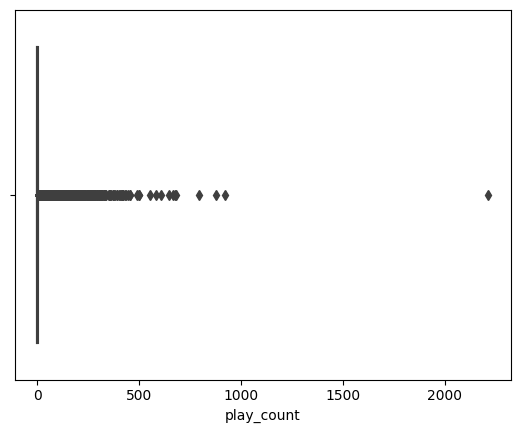

In [ ]:
sns.boxplot(df, x="play_count")

In [ ]:
df['play_count'].describe()

count    2.000000e+06
mean     3.045485e+00
std      6.579720e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      2.213000e+03
Name: play_count, dtype: float64

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [ ]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [ ]:
# We want our song to be listened by atleast 120 users to be considered
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [ ]:
# Check the shape of the data
df_final.shape

(117876, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3155

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

Total number of unique artists

In [ ]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

#### **Observations and Insights: 
In the final dataset, there are 3155 users, 563 songs, and 232 artists included.**


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
df_final['title'].value_counts(ascending=False).to_frame()

,title
Use Somebody,751
Dog Days Are Over (Radio Edit),748
Sehr kosmisch,713
Clocks,662
The Scientist,652
...,...
Who's Real,103
Brave The Elements,102
Creil City,101
Heaven Must Be Missing An Angel,97


Most interacted users

In [ ]:
df_final['user_id'].value_counts(ascending=False).to_frame()

,user_id
61472,243
15733,227
37049,202
9570,184
23337,177
...,...
19776,1
45476,1
17961,1
14439,1


#### **Observations and Insights:
The most interacted songs are the songs that have been listened to by the most users. The top 5 interacted songs are “Use Somebody”, “Dog Days Are Over (Radio Edit)”, “Sehr kosmisch”, “Clocks”, and “The Scientist”.
The most interacted users are the users who have listened to the most songs. The top 5 most interacted users are 61472, 15733, 37049, 9570, and 23337.
**


Songs played in a year

In [ ]:
# Find out the number of songs played in a year
  # Hint: # Hint: Use groupby function on the 'year' column

song_years = df_final.groupby('year')['title'].count().to_frame().reset_index()
song_years.head()

,year,title
0,0,20649
1,1969,238
2,1970,109
3,1971,133
4,1973,270


There are 20,649 songs that are missing the year of release. For this project, I will be dropping the these titles from the dataframe before creating the barplot.

In [ ]:
#drop row with no known year
song_years1 = song_years.drop([0], axis=0)
song_years1.head()

,year,title
1,1969,238
2,1970,109
3,1971,133
4,1973,270
5,1974,583


Text(0, 0.5, 'number of titles played')

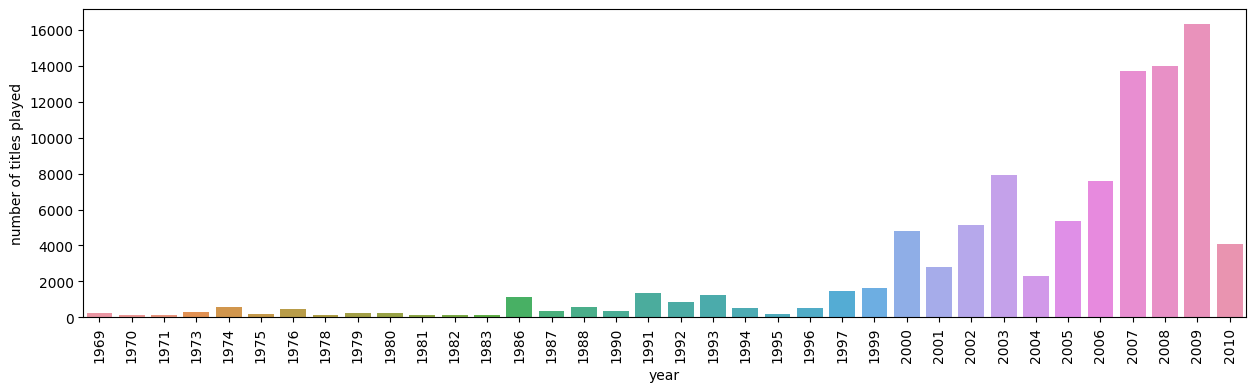

In [ ]:
# Create a barplot plot with y label as "number of titles played" and x -axis year

# Set the figure size
plt.figure(figsize = (15, 4))
sns.barplot(data= song_years1, x= 'year', y= 'title')

# Set the x label of the plot
plt.xlabel('year')
plt.xticks(rotation=90)

# Set the y label of the plot
plt.ylabel('number of titles played')

# Show the plot

#### **Observations and Insights: 
The all of songs in the data set with a reported year were released between the years of 1969-2010. The data is left skewed, and the years from 2000-2010 have the highest number of played titles. ** # 

**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_count =  df_final.groupby('song_id')['play_count'].mean()

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
play_freq =  df_final.groupby('song_id')['play_count'].count()

In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'average_count': average_count, 'play_freq': play_freq})

# Let us see the first five records of the final_play dataset
final_play.head()

,average_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs
def top_n_songs(final_play, n, min_interaction=100):
    # Finding songs with minimum number of playcounts
    recommendations = final_play[final_play['play_freq'] > min_interaction]
    
    # Sorting songs based on average playcount 
    recommendations = recommendations.sort_values(by='average_count',ascending=False)
    
    return recommendations.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above
top10 = list(top_n_songs(final_play, 10, 100))
print(top10)

[7224, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614, 352]


### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3193648 sha256=720fdd362998202c3130292451aaca40c60621934ce1593ff06f742cba72441b
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5? 

In [ ]:
# Instantiating Reader scale with expected rating scale 
 #use rating scale (0, 5)
reader = Reader(rating_scale = (0, 5))
# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)
# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)

**Think About It:** How changing the test size would change the results and outputs?

In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1 
sim_user_user = KNNBasic(sim_options = sim_options, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:

The RMSE value is 1.0878 for this model. The precision is very low at 0.396, but the recall is higher at 0.692. This tells that ~40% of the recommended songs were relevant, and ~70 of the relevant songs were recommended. The overall F_1 score is 0.504.**

In [ ]:
# Predicting play_count for a sample user with a listened song
df_final.loc[df['user_id'] == 74930].tail()

,user_id,song_id,play_count,title,release,artist_name,year
60369,74930,8425,1,Love Letter To Japan,Ray Guns Are Not Just The Future,the bird and the bee,2009
60370,74930,8434,1,Howlin For You,Brothers,The Black Keys,2010
60375,74930,8839,1,Moon And Moon,Sleep Alone/Moon and Moon,Bat For Lashes,2009
60377,74930,8982,2,Nightly Journey,Nightly Journey,Dim Pees,0
60388,74930,9981,4,Under Pressure,Queen On Fire - Live At The Bowl,Queen,1986


In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict("74930", "8982", r_ui = 2, verbose=True)

user: 74930      item: 8982       r_ui = 2.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='74930', iid='8982', r_ui=2, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
df_final[df_final.user_id == 47786].song_id.unique()

array([ 154,  211,  483,  512,  719,  757,  771,  892,  918,  961, 1044,
       1084, 1089, 1180, 1257, 1344, 1455, 1480, 1516, 1634, 1752, 1756,
       1787, 1818, 2107, 2161, 2289, 2514, 2672, 2701, 2786, 2898, 2914,
       2994, 3291, 3360, 3362, 3551, 3602, 3661, 3770, 3801, 3907, 4327,
       4761, 4873, 5101, 5115, 5193, 5441, 5633, 5823, 5886, 5894, 5916,
       6630, 6684, 6798, 7023, 7030, 7075, 7131, 7387, 7444, 7576, 7682,
       7737, 7900, 7911, 7921, 8178, 8190, 8272, 8425, 8599, 8839, 9076,
       9081, 9139, 9186, 9351, 9543, 9847])

In [ ]:
 #predict play_count for any sample user
sim_user_user.predict("47786", "8982", verbose=True)

user: 47786      item: 8982       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='47786', iid='8982', r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:

User "74930" played song "8982" 2 times, and the model predicted 1.7 plays. User "47786" had not listened to song "8982", so the model was used to predict how many times the user would play this song. The model predicted that user "47786" would have 1.7 plays for this song, which is identical to the prediction for user "74930".

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 25, 40], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine','pearson','pearson_baseline'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)
# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.045239613019965
{'k': 40, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True}}


In [ ]:
# Train the best model found in above gridsearch
sim_options = {'name': 'pearson_baseline', 
               'user_based': True}

# KNN algorithm with optimal parameters
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k= 40, min_k= 9, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user_optimized)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0517
Precision:  0.413
Recall:  0.728
F_1 score:  0.527


In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [30, 50, 60], 'min_k': [5, 8, 11],
              'sim_options': {'name': ['pearson_baseline'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)
# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0444360735798892
{'k': 50, 'min_k': 11, 'sim_options': {'name': 'pearson_baseline', 'user_based': True}}


In [ ]:
# Train the best model found in above gridsearch
sim_options = {'name': 'pearson_baseline', 
               'user_based': True}

# KNN algorithm with optimal parameters
sim_user_user_optimized2 = KNNBasic(sim_options = sim_options, k= 50, min_k= 11, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user_optimized2.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user_optimized2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0504
Precision:  0.411
Recall:  0.741
F_1 score:  0.529


**Observations and Insights:

I created two different optimized models, but there is not a huge differnce between the two. For the 1st model, I tested all 4 measures of similarity, and pearson baseline performed the best. Additionally, k=40 with min_k=9 was optimal. These were the highest values provided for k in the first test. Knowing this, I once again tried to optimize the model, and k=50 with min_k=9 was optimal.

Both of these models have a lower RMSE than the original model, and the 2nd optimized model has the lowest RMSE (orig: 1.0878, 1st: 1.0517, 2nd: 1.0504). The recall and F_1 score are the highest in the 2nd optimized model (1st: recall= 0.728, F_1= 0.527; 2nd: recall= 0.741, F_1= 0.529), but it has a slightly lower precision score from the 1st optimized (1st: 0.413, 2nd: 0.411). The F_1 score is still not a huge improvement from the original (increase of 0.025).

Based on the results, I will be using the 2nd optimized model for further predictions.
**

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized2.predict("6958", "1671", r_ui = 2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
 #Find song that is not listed for this user
df_final[df_final.user_id == 6958].song_id.unique()

array([ 447,  512,  549,  703,  719,  892, 1050, 1480, 1671, 1752, 1756,
       1787, 1818, 2107, 2289, 2304, 2425, 2501, 2701, 2898, 2994, 3074,
       3491, 3551, 3718, 3801, 3907, 5193, 5340, 5441, 5566, 5894, 6305,
       7738, 8029, 8037, 8425, 9065, 9351])

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized2.predict("6958", "413", verbose=True)

user: 6958       item: 413        r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='413', r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Using the optimized model on the original user and song
sim_user_user_optimized2.predict("74930", "8982", r_ui = 2, verbose=True)

user: 74930      item: 8982       r_ui = 2.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='74930', iid='8982', r_ui=2, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Using the optimized model on the second user and song
sim_user_user_optimized2.predict("47786", "8982", verbose=True)

user: 47786      item: 8982       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='47786', iid='8982', r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:

User "6958" played song "1671" 2 times, and the model predicted 1.7 plays. User "6958" had not listened to song "413", and the model predicted that this user would have 1.7 plays for this song as well.

The users and song that were used for the original model were retested on the optimized model. The results were exactly the same. There does not appear to be much difference in the predictions produced by the original and the optimized model.**

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Use inner id 0
sim_user_user_optimized2.get_neighbors(0, k = 5)

[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):    
    
    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')
    
    # Extracting those song ids which the user_id has not played yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_songs:
        
        # Predicting the plays for those non played song ids by this user
        est = algo.predict(user_id, item_id).est
        
        # Appending the predicted plays
        recommendations.append((item_id, est))

    # Sorting the predicted plays in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 74930, 5, sim_user_user_optimized2)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,7224,4.245254
1,4284,2.891722
2,8092,2.790921
3,5531,2.765917
4,7791,2.647695


**Observations and Insights: 

By using the get_recommendations function and the sim_user_user_optimized2 model, recommendations can be generated for any user. For the example, 5 recommendations were listed for user "74930", and the top song is recommended to have 4+ plays.**

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_play):
  # Sort the songs based on play counts
    ranked_songs = final_play.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()
  # Merge with the recommended songs to get predicted play_count
    ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')
  # Rank the songs based on corrected play_counts
    ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])
  # Sort the songs based on corrected play_counts
    ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)
    
    return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
4,7224,107,4.245254,4.148580
3,4284,461,2.891722,2.845147
1,8092,550,2.790921,2.748281
0,5531,618,2.765917,2.725691
2,7791,495,2.647695,2.602748


**Observations and Insights:

In this dataframe, the rankings from the get_recommendations function are recorded as the predicted play count, and the play frequency is accounted for to produce the corrected play count. The songs that have lower frequencies have a larger deduction for the corrected play count.
**

### Item Item Similarity-based collaborative filtering recommendation systems 

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights: 

The RMSE value is 1.0394 for this model. The precision is very low at 0.307, but the recall is higher at 0.562. This tells that ~30% of the recommended songs were relevant, and ~56% of the relevant songs were recommended. The overall F_1 score is 0.397.**

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict("6958", "1671", r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Find user that has not listened to the song (with song_id 1671)
df_final[df_final.user_id == 74930].song_id.unique()

array([ 118,  122,  693,  757,  892,  961,  990, 1180, 1348, 1634, 2234,
       2615, 2786, 3057, 3718, 4134, 4192, 4377, 4631, 4725, 5115, 5367,
       5886, 6175, 6350, 6959, 7075, 7260, 7387, 7519, 7737, 7900, 8034,
       8392, 8425, 8434, 8839, 8982, 9981])

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict("74930", "1671", verbose = True)

user: 74930      item: 1671       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='74930', iid='1671', r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:

User "6958" played song "1671" 2 times, and the model predicted 1.7 plays. User "74930" had not listened to song "1671", so the model was used to predict how many times the user would play this song. The model predicted that user "74930" would have 1.7 plays for this song, which is identical to the prediction for user "6958".**

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 25, 40], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine','pearson','pearson_baseline'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])
# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0228300811093216
{'k': 40, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Apply the best model found in the grid search
# Declaring the similarity options
sim_options = {'name': 'pearson_baseline',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k= 40, min_k= 6, random_state = 1)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item_optimized)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


Attempting to optimize the model a 2nd time.

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [35, 40, 45], 'min_k': [4, 5, 6],
              'sim_options': {'name': ['pearson_baseline'],
                              'user_based': [False]},
              'bsl_options': {'name': ['als', 'sgd']}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])
# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0234586520335318
{'k': 35, 'min_k': 5, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}, 'bsl_options': {'name': 'als'}}


In [ ]:
# Apply the best model found in the grid search
# Declaring the similarity options
sim_options = {'name': 'pearson_baseline',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item_optimized2 = KNNBasic(sim_options = sim_options, k= 35, min_k= 6, random_state = 1)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item_optimized2.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item_optimized2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0328
Precision:  0.408
Recall:  0.664
F_1 score:  0.505


**Observations and Insights:

I created two different optimized models, but there is not a barely any differnce between the two. For the 1st model, I tested all 4 measures of similarity, and pearson baseline performed the best. Additionally, k=40 with min_k=6 was optimal. Knowing this, I once again tried to optimize the model, and k=35 with min_k=6 was optimal.

Both of these models have the same RMSE which is lower than the original model (orig: 1.0394, opt: 1.0328). The recall and F_1 score are the highest in the 1st optimized model, and these values decrease by 0.001 in the 2nd model(1st: recall= 0.665, F_1= 0.506; 2nd: recall= 0.664, F_1= 0.505), but the precision score is the same in both optimized models (0.408). The F_1 score of the 1st model  is an improvement from the original (increase of 0.109).

Based on the results, I will be using the 1st optimized model for further predictions.**

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict("6958", "1671", r_ui = 2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict("6958", "3232", verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item_optimized.predict("74930", "1671", verbose = True)

user: 74930      item: 1671       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='74930', iid='1671', r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:

User "6958" played song "1671" 2 times, and the model predicted 1.7 plays. This is the same result from the original model. User "6958" had not listened to song "3232", and the model predicted that this user would have 1.7 plays for this song as well. Additionally, the prediction for user_id '74930' and song_id '1671' was unchanged from the original.

There does not appear to be a difference in the predictions produced by the original and the optimized model.**

In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[124, 523, 173, 205, 65]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 74930, 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,5399,3.044914
1,8654,3.033387
2,194,2.981655
3,6056,2.979795
4,4719,2.938090


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
0,8654,339,3.033387,2.979075
1,5399,222,3.044914,2.977799
3,194,136,2.981655,2.895906
4,6056,119,2.979795,2.888125
2,4719,188,2.938090,2.865157


**Observations and Insights:

In this dataframe, the rankings from the get_recommendations function are recorded as the predicted play count, and the play frequency is accounted for to produce the corrected play count. The songs that have lower frequencies have a larger deduction for the corrected play count.

The same user was user was used for the user-user optimized model and the item-item optimized model. None of the recommendations overlap between the models. The best recommendations would likely result from some combination of these models. **

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
# Using SVD matrix factorization
svd = SVD(random_state=1)

# Training the algorithm on the train set
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict("6958", "1671", r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.6989607635206787, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict("6958", "3232", verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0124587163672787
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_algo_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Train the algorithm on the train set
svd_algo_optimized = svd_algo_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_algo_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [30, 40, 50], 'lr_all': [0.01, 0.03, 0.05],
              'reg_all': [0.15, 0.2, 0.25]
              }

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


0.9987893699943579
{'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.15}


In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_algo_optimized2 = SVD(n_epochs = 50, lr_all = 0.01, reg_all = 0.15, random_state = 1)

# Train the algorithm on the train set
svd_algo_optimized2 = svd_algo_optimized2.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_algo_optimized2)

RMSE: 1.0041
Precision:  0.416
Recall:  0.622
F_1 score:  0.499


**Observations and Insights:

I created two different optimized models for SVD. For the models, I tested 3 diffeent parameters: n_epochs, lr_all, and reg_all.

Both of these models have the same RMSE which is lower than the original model (orig: 1.0252, opt: 1.0141). The recall, precision, and F_1 score are the highest in the 1st optimized model (recall: 0.635, precision: 0.415, F_1: 0.502). The recall for the 2nd optimized model was lower than the original (orig: 0.633, 2nd: 0.622).

Based on the results, I will be using the 1st optimized model for further predictions.**

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_algo_optimized.predict("6958", "1671", r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.6989607635206787, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_algo_optimized.predict("6958", "3232", verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

**Observations and Insights: 

User "6958" played song "1671" 2 times, and the model predicted 1.7 plays. This is the same result from the original model. User "6958" had not listened to song "3232", and the model predicted that this user would have 1.7 plays for this song as well.

There does not appear to be a difference in the predictions produced by the original and the optimized model.**

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, svd_algo_optimized)

In [ ]:
# Ranking songs based on above recommendations
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


**Observations and Insights:

As compared to the user-user and item-item models, the highest corrected_play_count is lower than all of the other corrected_play_count values. Song '7224' was also recommended by the user-user model with a corrected play count of 4.148. This model gave a much lower prediction.

****

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
co_clustering = CoClustering(random_state=1)

# Training the algorithm on the train set
co_clustering.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(co_clustering)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
co_clustering.predict("6958", "1671", r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.6989607635206787, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
co_clustering.predict("6958", "3232", verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 6, 9], 
              'n_cltr_i': [3, 6, 9], 
              'n_epochs': [10, 20, 30]}


# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0446794698017958
{'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 10}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm
# Building the optimized co_clustering model using optimal hyperparameters
co_clustering_optimized = CoClustering(n_epochs = 30, n_cltr_u = 3, n_cltr_i = 3, random_state = 1)

# Train the algorithm on the train set
co_clustering_optimized = co_clustering_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(co_clustering_optimized)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [2, 3, 4], 
              'n_cltr_i': [2, 3, 4], 
              'n_epochs': [30, 40, 50]}


# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0355428070739505
{'n_cltr_u': 2, 'n_cltr_i': 4, 'n_epochs': 50}


In [ ]:
# Train the tuned Coclustering algorithm
# Building the optimized co_clustering model using optimal hyperparameters
co_clustering_optimized2 = CoClustering(n_epochs = 50, n_cltr_u = 2, n_cltr_i = 4, random_state = 1)

# Train the algorithm on the train set
co_clustering_optimized2 = co_clustering_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(co_clustering_optimized2)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


**Observations and Insights: 

The RMSE value is 1.0487 for this model. The precision is low at 0.397, but the recall is higher at 0.582. This tells that ~40% of the recommended songs were relevant, and ~60% of the relevant songs were recommended. The overall F_1 score is 0.472.**

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
co_clustering_optimized.predict("6958", "1671", r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.6989607635206787, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
co_clustering_optimized.predict("6958", "3232", verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

**Observations and Insights: 

User "6958" played song "1671" 2 times, and the model predicted 1.7 plays. This is the same result from the original model. User "6958" had not listened to song "3232", and the model predicted that this user would have 1.7 plays for this song as well.

There does not appear to be a difference in the predictions produced by the original and the optimized model.
**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, co_clustering_optimized)

### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
2,7224,107,3.094797,2.998124
4,8324,96,2.311498,2.209436
1,9942,150,2.215039,2.133390
0,5531,618,2.124563,2.084337
3,4831,97,2.123783,2.022248


**Observations and Insights: 

The user-user model also recommended songs '7224' (CPC: 4.149) and '5531'(CPC: 2.726). This model predicted much fewer plays for both songs.

The SVD model also recommended songs '7224' (CPC: 2.505), '8324' (CPC: 1.912), and '9942' (CPC: 1.858). This model predicted more play counts for all 3 songs.*

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
#Save df_final as new dataframe called df_small
df_small = df_final

# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small.drop(['release', 'artist_name', 'year'], axis = 1)
# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(['title'])
# Set the title column as the index
df_small = df_small.set_index('title')
# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet 
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:
# Create a function to tokenize the text
def tokenize(text):
    
    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    # Extracting each word in the text
    tokens = word_tokenize(text)
    
    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]
    
    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [ ]:
# Making the DataFrame of movie_tfidf data
pd.DataFrame(song_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
   
    recommended_songs = []
    
    indices = pd.Series(df_small.index)
    
    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)
    
    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

**Observations and Insights:

This content based algorithm recommended 10 songs that none of the other models recommended. This is the only model that based the recommendations solely on information derived from the song information rather than popularity or preferences of the users.

**

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:

- The cluster based model as well as the user-user, item-item, and matrix factorization collaborative filtering models were scored using RMSE, precision, recall, and F1 score as measures of success.

- The model with the lowest RMSE is the 2nd optimized SVD model (1.0041). However, this model did not have great recall. The 1st optimized SVD model has the next lowest RMSE value (1.0141). This SVD model has a F1 score of 0.502.

- The model with the highest F1 score is the 2nd optimized user-user model (0.529). However, this model has the highest RMSE value. WHile this model does not have the highest overall precision, it has the highest overall recall (0.741). In this model, ~40% of the recommendations were relevant, and ~75% of the relevant recommendations were provided.

- The user-user model is performing relatively better because many of the relevant songs would be recommended, but this model still needs to be improved because it is recommending many songs that are not relevant to the user.

**2. Refined insights**:

- The low precision scores of the models are indicative that there is more tuning that needs to be done to the models. Although there are many unique songs that are being recommended, users will not be very pleased with the amount of recommended songs that are not relevant to them.
- The popularity based model is a good way to introduce users to new songs, and the content based model will use key words to recommend similar songs.
- The models that use user preferences to recommend songs, still need to be tuned.

**3. Proposal for the final solution design:** 

- I think that the user-user model is performing the best, and should be adopted. I recommend that it be tuned more, but it is already perfoming more highly than other models.
- The best recommendation system might actually be a combination of these systems. For the next model, I propose combining the user-user and item-item models to create a hybrid user-item model.

# -------------------------------------------------------------------------------------------

# **Final Submission**

### Executive summary

The most important findings from the analysis done in the milestone:

- The cluster-based model and the user-user, item-item, and matrix factorization collaborative filtering models were scored using RMSE, precision, recall, and F1 score as measures of success.
 
- The model with the lowest RMSE is the SVD model. Matrix factorization has a low RMSE because it assumes that the songs and users are present in a low-dimensional space, thus songs are recommended based on their proximity to the user while also taking latent features into account. However, this model did not have great recall. This is likely because the latent features included the title and release album, which are not always extremely useful for judging the content of a song. Artist name is useful for finding similar songs, and genre would be a helpful feature to include in the future.

- The user-user model is performing relatively better than the rest because it has great recall but low precision. This means that many of the relevant songs would be recommended, but this model still needs to be improved because it is recommending many songs that are not relevant to the user. For a recommendation system, the F1 score is more informative than the RMSE value.

- The item-item model also had a fairly good recall but an extremely low precision score. This model is not great, but it improved after optimization and still performed better than the clustering model. The clustering model had a fairly high RMSE score and the lowest F1 score. After two attempts at optimization, the metrics did not improve for this model.

- The low precision scores of the models indicate that there is more tuning that needs to be done to the models. Although many unique songs are being recommended, users will not be very pleased with the amount of recommended songs that are not relevant to them.

- The popularity-based model is a good way to introduce users to new songs, so this is an ideal model to incorporate for new users and users with low song interaction. The content-based model will use keywords to recommend similar songs, but genre would be a much better indication of song similarity.

Provide the final proposed model specifications:

Based on these findings, the proposed final solution design is to adopt the user-user model, which is performing the best, and tune it further. Additionally, a combination of the user-user and item-item models should be used to create a hybrid user-item model to make more precise recommendations. Additionally, the popularity model is ideal to implement for new users who need song recommendations.

### Problem and solution summary

Summary of the problem:

Users may find it overwhelming and time-consuming to manually search for new songs in the vast amount of music available today. The solution is to create a music recommendation system that provides personalized recommendations based on the user's listening history and preferences to save users time and effort in finding new music.

Reason for the proposed solution design: 

The proposed solution is to use the user-user model that performed the best in terms of recall and precision, although it still needs tuning. Recall is a very important metric for recommendation systems because it tells the fraction of relevant songs that are recommended to the user. However, recall needs to be balanced with precision, which tells the fraction of recommended items that are relevant. Even if a model can recommend many relevant songs, the user could become frustrated with the recommendations if there are too many irrelevant songs.

To increase precision, a combination of the user-user and item-item models could be the best recommendation system. These two models had the highest F-1 scores, and combining them would potentially lead to higher precision. Rather than suggesting new songs based only on what similar users listen to, the hybrid model would prioritize recommending songs that are also similar to songs that the user has liked in the past.

Additionally, a popularity-based model would be beneficial to implement for new users because they do not have any known existing preferences that the model can use for recommendations. A popularity-based model would also help existing users who do not know where to start when looking for completely new and fresh music.

How it would affect the problem/business? 

The proposed solution design would positively affect the business by improving user engagement and satisfaction with a music service, leading to increased usage and customer loyalty. The music recommendation system will save users time and effort in finding new music and provide personalized recommendations based on the user's listening history and preferences. Better music recommendations will increase user satisfaction, and the likelihood of users continuing to use and enjoy the music service. An efficient recommendation system will increase the usage of the music service, leading to more revenue for the business.

### Recommendations for implementation

Key recommendations to implement the solutions:

- I recommend investing in recommendation engines that are powered by machine learning. There is a lot of user and song data that will need to be constantly created, deleted, updated, and used. Without having the equipment needed to keep the recommendation engine running, users will not receive recommendations and will be less likely to continue using the service.
- Additionally, the user-user and user-item hybrid model should undergo further tuning to improve precision scores. The models perform well in providing relevant recommendations, but it is important to ensure that customers are receiving the most tailored recommendations possible.
- The popularity-based model is valuable for introducing users to new songs, which is important due to new music being constantly released. New music should be featured near the top to make it easy for users to see what music is fresh and trending.

Key actionables for stakeholders and expected benefits/costs:

- It is important to choose the right technology to run such a complex recommendation system. Stakeholders should carefully evaluate different options to choose the one that best fits their needs and resources. This system will be responsible for over 80 million songs and 500 million Spotify users.
- To keep this system up to date, Spotify should ensure that it is collecting enough data to provide relevant recommendations. This may include user listening histories, social media activity, and demographic information.
- Implementing a new recommendation system can be a significant investment in terms of time, money, and personnel. However, a new recommendation system can help Spotify users discover new music they will love, which in turn can increase user engagement and retention. A more personalized and engaging user experience can lead to increased revenue for Spotify, as users may be more likely to subscribe to the platform and increase engagement by recommending the platform to others.

Key risks and challenges:

- Collecting and analyzing user data for recommendation purposes raises privacy concerns, and stakeholders must ensure that they are following appropriate regulations and best practices. Some users may be hesitant to share this data due to privacy concerns.
- Recommendation systems can be complex, and there may be technical challenges associated with implementation and maintenance. The system requires significant computational power. Ensuring that the system is scalable, reliable, and continually available requires an ongoing supply of resources.

Further analysis and associated problems to solve:

- There should be more attention given to recommending songs to new users. The proposed popularity-based model can be helpful, but other methods, such as content-based filtering, can help to fine-tune recommendations for new users. To inprove upon the content-based model, more information is needed about the songs, such as the genre.
- The current evaluation metrics for analysis (RMSE, precision, recall, and F1 score) do not capture all aspects of user satisfaction. Using other metrics, such as user engagement or likes/dislikes, could prove to be more helpful to evaluate the effectiveness of the recommendation system.
- Further analysis is required to fine-tune the user-user and hybrid user-item models to improve their performance metrics. The models have been trained on a dataset, but there is much more song and user information that the recommendation system will be responsible for.